In [14]:
from yeastvision.data.ims import Experiment
import glob
import numpy as np
from skimage.io import imsave
import os
import matplotlib.pyplot as plt

In [32]:
npz_file = "test.npz"
arr1 = np.zeros((10,10))
arr2 = np.eye(10)

In [46]:
np.savez(npz_file, arr = arr1)
data = np.load(npz_file, mmap_mode="w")
data["arr"][:2] = 2
data["arr"]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [45]:
data["arr"]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [37]:
arr

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [38]:
data["arr"]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [15]:
test_dir = "test"
dirs_to_test = [os.path.join(test_dir, dir_) for dir_ in["Pos0", "Pos2", "Pos5", "Pos6"]]
params = [(1,1), (1,1), (3,0), (3,2)]
dirs_to_test, params

(['test/Pos0', 'test/Pos2', 'test/Pos5', 'test/Pos6'],
 [(1, 1), (1, 1), (3, 0), (3, 2)])

In [16]:
exp1 = Experiment(dirs_to_test[0], num_channels=1)

 33%|███▎      | 1/3 [00:00<00:00,  8.20it/s]

test/Pos0/channel_0_artilife_0-10.npz
loading from npz
test/Pos0/channel_0_budNET_0-10.npz
loading from npz


100%|██████████| 3/3 [00:00<00:00,  6.57it/s]


test/Pos0/cytoplasm.npz
loading from npz


In [17]:
print(exp1.has_labels())

True


In [23]:
def getFloatCmap():
    cmap = plt.get_cmap("gist_rainbow", 256)
    colors = []
    i = 0
    for i in range(0,256):
        temp = np.array(list(cmap(i)))
        temp *=255.0
        colors.append(tuple(temp))
    colors = colors*100
    colors = np.array(colors, dtype = np.uint8)
    colors[:,-1] = colors[:,-1]//2
    colors[0,-1] = 0
    return colors
cmap = getFloatCmap()


In [25]:
from cellpose.transforms import normalize99

    
def processProbability(rawProb):
    return (np.clip(normalize99(rawProb.copy()), 0, 1) * 255).astype(np.uint8)

In [18]:
for a in dict(np.load(exp1.labels[0].npz_path)).values():
    print(a.shape)

(127, 520, 692)
(127, 520, 692)
(127, 520, 692)


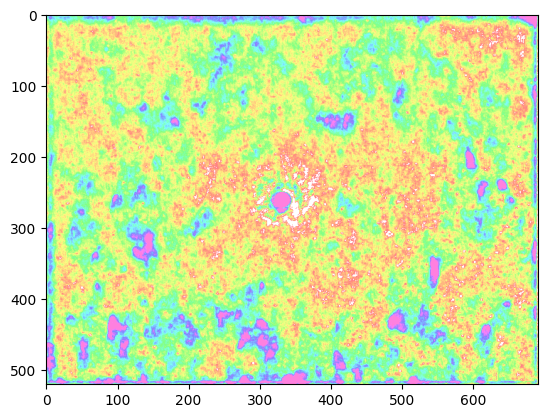

In [26]:
label = processProbability(exp1.get_label("probability", idx=0, t = 0))

plt.imshow(cmap[label])

In [20]:
data = dict(np.load(exp1.npz_path))
(data["labels"].shape)

AttributeError: 'Experiment' object has no attribute 'npz_path'

In [ ]:
#print(len(exp1.labels[0].ims))

AttributeError: 'Label' object has no attribute 'ims'

In [ ]:
exp1.get_dummy_labels()

(520, 692) 101
101 520 692


array([0, 0, 0])

In [ ]:
label = exp1.get_channel(idx = 0,t = 0)

In [ ]:
label

array([[383, 403, 355, ..., 379, 347, 431],
       [375, 359, 379, ..., 383, 371, 355],
       [359, 399, 391, ..., 367, 379, 379],
       ...,
       [367, 335, 363, ..., 343, 343, 339],
       [343, 363, 403, ..., 347, 363, 331],
       [335, 347, 359, ..., 327, 323, 351]], dtype=uint16)